# Applied Data Science with Python

## Course-End Project Problem Statement

### Sales Analysis

#### Project Statement:

AAL has been a well-known name in Australia, particularly recognized for its clothing business since 2000. The company serves diverse demographics, including kids, women, men, and seniors, and has established branches across various states in Australia, encompassing metropolises as well as tier-1 and tier-2 cities.
Currently experiencing a surge in business, AAL is actively pursuing expansion opportunities. To facilitate informed investment decisions, the CEO has assigned the responsibility to the Head of Sales and Marketing (S&M) at AAL. The specific tasks include:

1) Identify the states that are generating the highest revenues.
2) Develop sales programs for states with lower revenues. The Head of Sales and Marketing has requested your assistance with this task.
3) Analyze the sales data of the company for the fourth quarter in Australia, examining it on a state-by-state basis. Provide insights to assist the company in making data-driven decisions for the upcoming year.
*Enclosed is the CSV (AusApparalSales4thQrt2020.csv) file that covers the said data.

### Perform the following steps:

As a data scientist, you must perform the following main steps on the enclosed data:

1. Data wrangling
2. Data analysis
3. Data visualization
4. Report generation

### Data wrangling

    a. Ensure that the data is clean and free from any missing or incorrect entries. Inspect the data manually to identify missing or incorrect information using the functions isna() and notna().

    b. Based on your knowledge of Data Analytics, include your recommendations for treating missing and incorrect data (dropping the null values or filling them).

    c. Choose a suitable Data Wrangling technique—either data standardization or normalization. Execute the preferred normalization method and present the resulting data. (Normalization is the preferred approach for this problem.

    d. Share your insights regarding the application of the GroupBy() function for either data chunking or merging, and offer a recommendation based on your analysis.

### Data analysis

    a. Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis.

    b. Identify the group with the highest sales and the group with the lowest sales based on the data provided.

    c. Identify the group with the highest and lowest sales based on the data provided.

    d. Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.
    (Use suitable libraries such as NumPy, Pandas, SciPy, etc. for performing the analysis.)

### Data visualization

    a. Use suitable data visualization libraries to construct a dashboard for the Head of Sales and Marketing (S&M). The dashboard should encompass key parameters:

        * State-wise Sales Analysis for Different Demographic Groups (Kids, Women, Men, and Seniors).

        * Group-wise Sales Analysis (Kids, Women, Men, and Seniors) Across Various States.

        * Time-of-the-Day Analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. This information aids in designing programs like hyperpersonalization and Next Best Offers to enhance sales.

    b. Ensure the visualization is clear and accessible for effective decision-making by the Head of S&M.
    The dashboard must contain daily, weekly, monthly, and quarterly charts.
    (Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.)

    c. Include your recommendation and indicate why you are choosing the recommended visualization package.

### Report generation
a) Use JupyterLab Notebook for generating reports, which includes tasks such as data wrangling, analysis, and visualization. Please note that JupyterLab enables you to integrate code seamlessly with graphs and plots.
b) Use Markdown in suitable places while presenting your report.
c) Use suitable graphs, plots, and analysis reports in the report, along with recommendations. Note that various aspects of analysis require different graphs and plots.

* Use a box plot for descriptive statistics.

* Use the Seaborn distribution plot for any other statistical plotting.

## Importing Libraries

In [1]:

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Filtering Warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Setting seaborn theme
sns.set_theme(context ='paper', style = 'darkgrid')

### Load XLSX file

In [3]:
# Loading the file that contains the Sales data
sales_data = pd.read_excel('1688639662_ausapparalsales4thqrt2020.xlsx')

### Checking Statistical Parameters

In [4]:
sales_data.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [5]:
sales_data.tail()

,Date,Time,State,Group,Unit,Sales
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500
7559,2020-12-30,Evening,TAS,Seniors,13,32500


In [6]:
# Viewing the types and null values of the data
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [7]:
# Checking memory uses column wise
sales_data.memory_usage(deep = 1)

Index       132
Date      60480
Time     496440
State    457920
Group    474390
Unit      60480
Sales     60480
dtype: int64

In [8]:
# Checking for null Values
sales_data.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

##### We can conclude from this table that there are no missing data in the table
##### the total number of the sales data is 7560

In [9]:
# Desciptive stats of the numeric data types
sales_data.describe()

,Date,Unit,Sales
count,7560,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201
min,2020-10-01 00:00:00,2.000000,5000.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000
50%,2020-11-15 12:00:00,14.000000,35000.000000
75%,2020-12-08 00:00:00,26.000000,65000.000000
max,2020-12-30 00:00:00,65.000000,162500.000000
std,NaN,12.901403,32253.506944


In [10]:
# Checking for duplicates
sales_data[sales_data.duplicated()].count()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [11]:
# Unique Entries
print(sales_data['Time'].unique())
print(sales_data['State'].unique())
print(sales_data['Group'].unique())


[' Morning' ' Afternoon' ' Evening']
[' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']
[' Kids' ' Men' ' Women' ' Seniors']


In [12]:
# Creating a copy of the sales_data for further processing
sd = sales_data.copy(deep = 1)

In [13]:
# Changing the column name sto lower case
sd.columns = sd.columns.str.lower()

## Basic Data Cleaning and Processing

### Checking for Outliers

##### Outliers in the Unit column

In [14]:
px.box(sd['unit'])

In [15]:
Q1 = sd['unit'].quantile(0.25)
Q3 = sd['unit'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (sd['unit'] >= Q1 - 1.5 * IQR) & (sd['unit'] <= Q3 + 1.5 *IQR)
md = sd.loc[filter]

###### We can observe from the box plot that the units 54 and above are the outliers in the plot

##### Now in the Sales columns

In [16]:
px.box(md['sales'])

In [17]:
# Defining Quartiles
Q1 = md['sales'].quantile(0.25)
Q3 = md['sales'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
# Filtering data based on Quartiles
filter = (md['sales'] >= Q1 - 1.5 * IQR) & (md['sales'] <= Q3 + 1.5 *IQR)
md = md.loc[filter]


##### As we can observe, the sales above 125K to 132.5K are the outliers and 'md' is new data frame after renmoving Outliers 

In [18]:
pd.DataFrame([sd.groupby('group').count()['sales'],md.groupby('group').count()['sales']], index = ['before', 'after'])

group,Kids,Men,Seniors,Women
before,1890,1890,1890,1890
after,1856,1850,1851,1852


* As we can see from the above data all the four groups kids, men, seniors and women lost 34, 40, 39 & 38 values respectively
* 'md' is the dataframe with outliers from unit and sales removed

#### Normalization

In [19]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'Unit' column and add it to the DataFrame
sd['normalized_unit'] = scaler.fit_transform(sd[['unit']])

# Fit and transform the 'Sales' column and add it to the DataFrame
sd['normalized_sales'] = scaler.fit_transform(sd[['sales']])

sd.describe()

,date,unit,sales,normalized_unit,normalized_sales
count,7560,7560.000000,7560.000000,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201,0.254054,0.254054
min,2020-10-01 00:00:00,2.000000,5000.000000,0.000000,0.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000,0.095238,0.095238
50%,2020-11-15 12:00:00,14.000000,35000.000000,0.190476,0.190476
75%,2020-12-08 00:00:00,26.000000,65000.000000,0.380952,0.380952
max,2020-12-30 00:00:00,65.000000,162500.000000,1.000000,1.000000
std,NaN,12.901403,32253.506944,0.204784,0.204784


## Visualisation

In [20]:
# Extracting Max and Minimum of the Sales
sd.set_index('sales').sort_index().head(1)


,date,time,state,group,unit,normalized_unit,normalized_sales
sales,,,,,,,
5000,2020-11-26,Morning,WA,Women,2,0.0,0.0


In [21]:

# Minimumm Sales value
sd.set_index('sales').sort_index().tail(1)

,date,time,state,group,unit,normalized_unit,normalized_sales
sales,,,,,,,
162500,2020-12-24,Evening,VIC,Seniors,65,1.0,1.0


In [22]:
# Using plotly histogram for more data and interaction
sales_hist = px.histogram(sd['sales'])
sales_hist

* From the above graph, we can see that the highest value sale is of value 162.5k which occured 11 times
* while the sales of value 22.5k has occured 406 times which is highest by count
* the lowest ssales value is of 5000 which occured 130 times

In [23]:
# Using plotly histogram for more data and interaction
unit_hist = px.histogram(sd['unit'])
unit_hist

* From the above graph, we can see that the highest value of unit is of value 65 which occured 11 times
* while the unit of value 9 has occured 406 times which is highest by count
* the lowest unit value is of 2 which occured 130 times
* We can also see that, frequency of the data in sales and unit is same.

In [24]:
print(f'>>> {162500/65}')
print(f'>>> {22500/9}')


>>> 2500.0
>>> 2500.0


* We can see that the per unit price is 2500

<Axes: title={'center': 'Sales by State Graph'}, xlabel='state', ylabel='sales'>

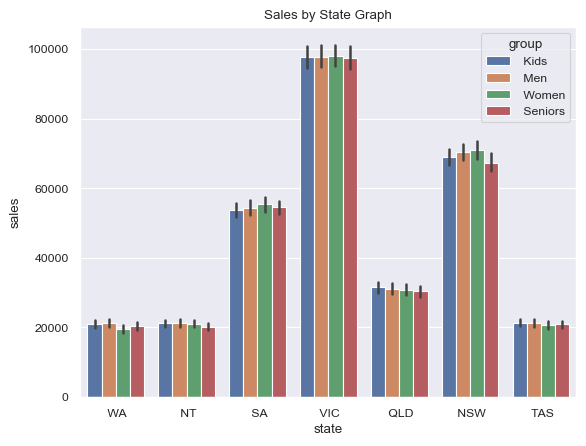

In [52]:
# Using seaborn graph to show sales in different States
state_sales = sns.barplot(data = sd,
            x = 'state',
            y = 'sales',
            hue = 'group')
plt.title('Sales by State Graph')
state_sales

* From the  graph we can infer that the sales is highest in the VIC state followed by NSW and SA,
* The highest sales in VIC was from Women whereas it was lowest in WA

* The lowest sales states are WA NT and TAS

<Axes: title={'center': 'Sales by State Graph'}, xlabel='group', ylabel='sales'>

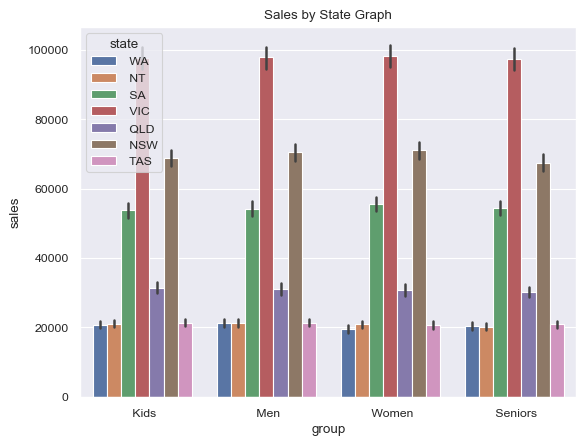

In [62]:
# Using seaborn graph to show sales in different States
state_sales = sns.barplot(data = sd,
            x = 'group',
            y = 'sales',
            hue = 'state')
plt.title('Sales by State Graph')
state_sales

<Axes: title={'center': 'Sales by TIME Graph'}, xlabel='time', ylabel='sales'>

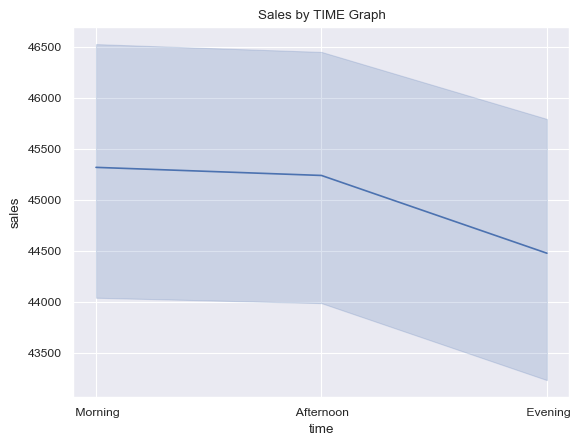

In [26]:
# Using seaborn graph to show sales in different time
time_sales = sns.lineplot(data = sd,
            x = 'time',
            y = 'sales')
plt.title('Sales by TIME Graph')
time_sales

<Axes: title={'center': 'Sales by Group Graph'}, xlabel='group', ylabel='sales'>

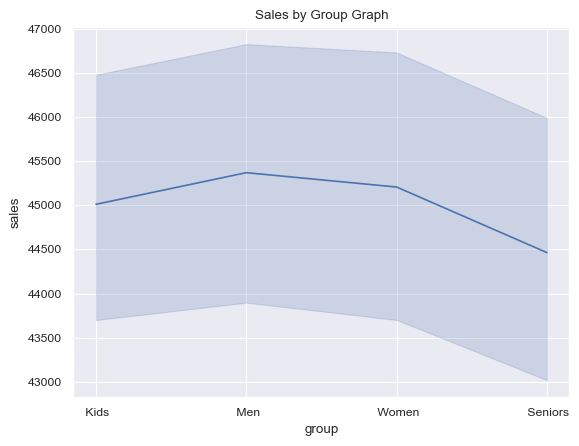

In [27]:
# Using seaborn graph to show sales in different Group
group_sales = sns.lineplot(data = sd,
            x = 'group',
            y = 'sales')
plt.title('Sales by Group Graph')
group_sales

### Generate daily, weekly, monthly and quarterly reports for the analysis made.

In [28]:
sd.set_index('date', inplace=True)  # Set date column as index

In [29]:
# Daily Report: resample by D
daily_report = sd.resample('D').sum()
daily_sale = px.line(data_frame=sd.resample('D').sum(),
       y = daily_report['sales'],
       title='Daily Sales')
daily_sale

In [30]:
# Weekly Report: resample by week and start with Monday
weekly_report = sd.resample('W-MON').sum()
weekly_sale = px.line(data_frame=sd.resample('W-MON').sum(),
       y = weekly_report['sales'],
       title='Weekly Sales')
weekly_sale

In [31]:
# Monthly Report: resample by month
monthly_report = sd.resample('M').sum()
monthly_sale = px.line(data_frame=sd.resample('M').sum(),
       y = monthly_report['sales'],
       title='Monthly Sales')
monthly_sale

In [32]:
# Quaterly Report: resample by month
quaterly_report = sd.resample('Q').sum()
quaterly_sale = px.bar(data_frame=sd.resample('Q').sum(),
       y = quaterly_report['sales'],
       title='Quaterly Sales')
quaterly_sale

* From the graphs of daily, weekly and monthly we can see that the november had the lowest sales while december had the highest sales
* For Quaterly graph we have only one bar as the dataset contains data from only one quater.

## DashBoard

In [51]:
df_daily = sd.resample('D').sum()


# Creating the dashboard
fig = make_subplots(rows=2,
                    cols=4,
                    subplot_titles=("State-wise sales Analysis",
                                    "Group-wise sales Analysis",
                                    "Time-of-the-day Analysis",
                                    "Unit-Sales Analysis ",
                                    "Sales Trends Analysis Daily",
                                    "Sales Trends Analysis Weeakly ",
                                    "Sales Trends Analysis Monthly ",
                                    "Sales Trends Analysis Quarterly"))

# state-wise sales analysis for different groups
fig.add_trace(go.Bar(x=sd['state'],
                     y=sd['sales'],
                     name='sales',
                     marker=dict(color='rgb(34, 111, 255)')),
            row=1, col=1)
fig.add_trace(go.Bar(x=sd['state'],
                     y=sd['normalized_sales'],
                     name='Normalized sales'),
            row=1, col=1)

# group-wise sales analysis across different states
fig.add_trace(go.Bar(x=sd['group'],
                     y=sd['sales'],
                     name='sales'),
            row=1, col=2)
fig.add_trace(go.Bar(x=sd['group'],
                     y=sd['normalized_sales'],
                     name='Normalized sales',
                     marker=dict(color='rgb(55, 83, 109)')),
            row=1, col=2)

# time-of-the-day analysis
df_time_analysis = sd.groupby('time').sum().reset_index()  # Aggregating data for time analysis
fig.add_trace(go.Bar(x=df_time_analysis['time'],
                     y=df_time_analysis['sales'],
                     name='sales'),
            row=1, col=3)
fig.add_trace(go.Bar(x=df_time_analysis['time'],
                     y=df_time_analysis['normalized_sales'],
                     name='Normalized sales'),
            row=1, col=3)

# unit-wise sales analysis
fig.add_trace(go.Scatter(x=sd['unit'],
                     y=sd['sales'],
                     name='sales'),
            row=1, col=4)
fig.add_trace(go.Scatter(x=sd['unit'],
                     y=sd['normalized_sales'],
                     name='Normalized sales',
                     marker=dict(color='rgb(55, 83, 109)')),
            row=1, col=4)

# Add traces for sales trends
fig.add_trace(go.Scatter(x=df_daily.index,
                         y=df_daily['sales'],
                         mode='lines+markers',
                         name='Daily sales'),
            row=2, col=1)
fig.add_trace(go.Scatter(x=weekly_report.index,
                         y=weekly_report['sales'],
                         mode='lines+markers',
                         name='Weekly sales'),
            row=2, col=2)
fig.add_trace(go.Scatter(x=monthly_report.index,
                         y=monthly_report['sales'],
                         mode='lines+markers',
                         name='Monthly sales'),
            row=2, col=3)
fig.add_trace(go.Bar(x=quaterly_report.index,
                     y=quaterly_report['sales'],
                     name='Quarterly sales'), 
            row=2, col=4)

# Update layout
fig.update_layout(showlegend=False,
                  title_text="Sales Dashboard for S&M Head")

# Show the plots
fig.show()